In [2]:
!wget https://www.dropbox.com/s/oipghlun5bgfyqd/csv_result-KDDTrain%2B.csv?dl=0
!wget https://www.dropbox.com/s/b7zh0zip4h05wxr/csv_result-KDDTest-21%20%281%29.csv?dl=0

--2023-05-23 17:09:24--  https://www.dropbox.com/s/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv [following]
--2023-05-23 17:09:25--  https://www.dropbox.com/s/raw/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc762900565e8bf1ef2c90c1db42.dl.dropboxusercontent.com/cd/0/inline/B8n8RFJo3GTvz6IQ9_A_2w5rxAjtNfDUbe_TRXNGo-X6Jk2e2YSa7JWEOXpKvJgczFA8t37rt-lvKFutfp_yTa42RYaLhmtQnzW9i4sAsw-h_2xc4vMCbmo9Aq03YJT7AayC6jH3DdEUDGlg3Rb1YIpmlgRH3wwMeKcX-1Zfxkexiw/file# [following]
--2023-05-23 17:09:25--  https://uc762900565e8bf1ef2c90c1db42.dl.dropboxusercontent.com/cd/0/inline/B8n8RFJo3GTvz6IQ9_A_2w5rxAj

#Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC


#EDA KDD

In [4]:
df1 = pd.read_csv("/content/csv_result-KDDTest-21 (1).csv?dl=0")
df2 = pd.read_csv("/content/csv_result-KDDTrain+.csv?dl=0")

In [5]:
df_kdd = pd.concat((df1, df2), axis = 0)

In [6]:
df_kdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137823 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             137823 non-null  int64  
 1   'duration'                     137823 non-null  int64  
 2   'protocol_type'                137823 non-null  object 
 3   'service'                      137823 non-null  object 
 4   'flag'                         137823 non-null  object 
 5   'src_bytes'                    137823 non-null  int64  
 6   'dst_bytes'                    137823 non-null  int64  
 7   'land'                         137823 non-null  int64  
 8   'wrong_fragment'               137823 non-null  int64  
 9   'urgent'                       137823 non-null  int64  
 10  'hot'                          137823 non-null  int64  
 11  'num_failed_logins'            137823 non-null  int64  
 12  'logged_in'                   

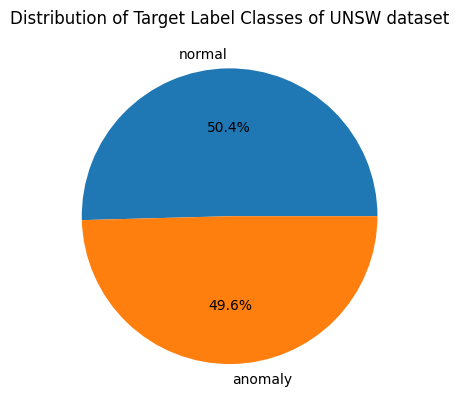

In [7]:
class_counts = df_kdd["'class'"].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Target Label Classes of UNSW dataset')

plt.show()

In [8]:
df_kdd = df_kdd.drop(["id"], axis=1)
df_kdd = df_kdd.dropna()

In [9]:
le=LabelEncoder()
df_kdd["'protocol_type'"] = le.fit_transform(df_kdd["'protocol_type'"])
df_kdd["'service'"] = le.fit_transform(df_kdd["'service'"])
df_kdd["'flag'"] = le.fit_transform(df_kdd["'flag'"])
df_kdd["'class'"] = le.fit_transform(df_kdd["'class'"])

In [11]:
class_0 = df_kdd[df_kdd["'class'"] == 0]
class_1 = df_kdd[df_kdd["'class'"] == 1]
class_0_downsampled = class_0.sample(n=3500, random_state=42)
class_1_downsampled = class_1.sample(n=3500, random_state=42)

downsampled_df = pd.concat([class_0_downsampled, class_1_downsampled])
downsampled_df = downsampled_df.sample(frac=1, random_state=42)
downsampled_df = downsampled_df.reset_index(drop=True)

In [12]:
X = downsampled_df.drop(["'class'"], axis = 1)
y  = downsampled_df["'class'"]


In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Machinbe Learning

# Random Forest

In [23]:
forest = RandomForestClassifier()
start_time = time.time()
forest.fit(X_train, y_train)
end_time = time.time()
execution_time_rfc = end_time - start_time
print("Time taken for training:", execution_time_rfc, "seconds")

Time taken for training: 0.71453857421875 seconds


In [24]:
y_pred_test = forest.predict(X_test)

In [25]:
 accuracy_rf = accuracy_score(y_test, y_pred_test)
 accuracy_rf

0.9878571428571429

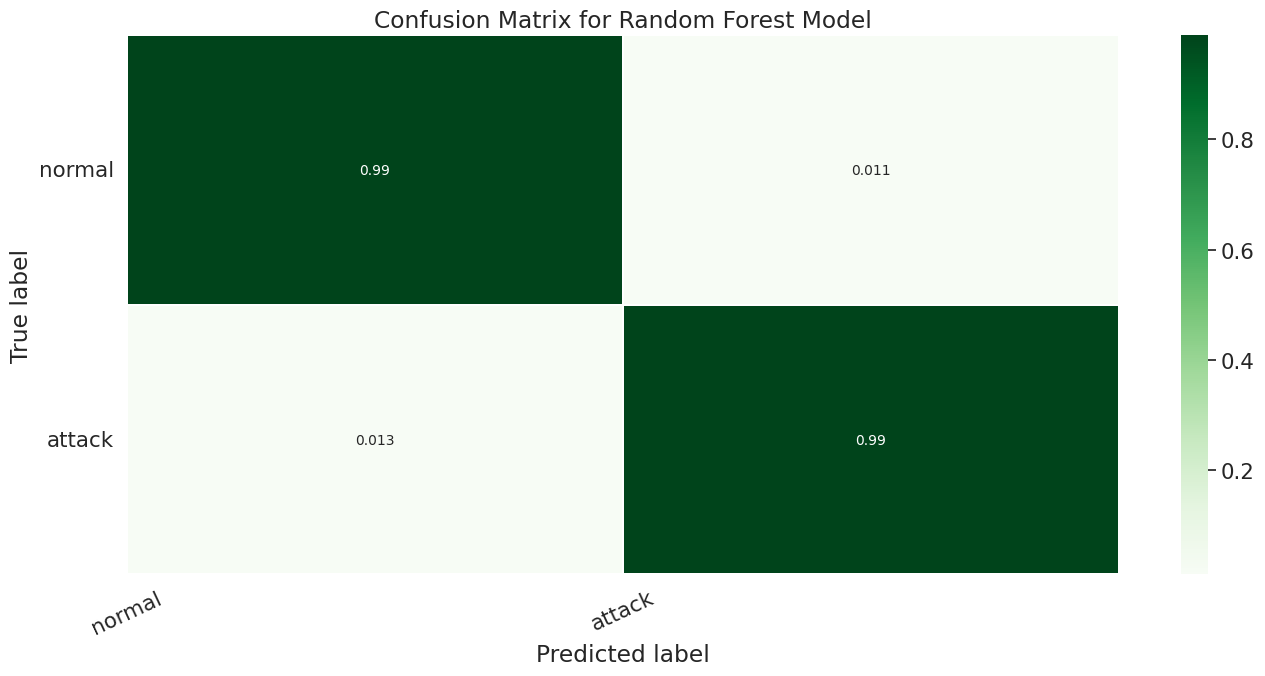

In [26]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [27]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       702

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



# KNN


In [28]:
KNN = KNeighborsClassifier()
start_time = time.time()
KNN.fit(X_train, y_train)
end_time = time.time()
execution_time_knn = end_time - start_time
print("Time taken for training:", execution_time_knn, "seconds")

Time taken for training: 0.005893707275390625 seconds


In [29]:
y_pred_test = KNN.predict(X_test)

In [30]:
accuracy_knn = accuracy_score(y_test, y_pred_test)
accuracy_knn

0.9642857142857143

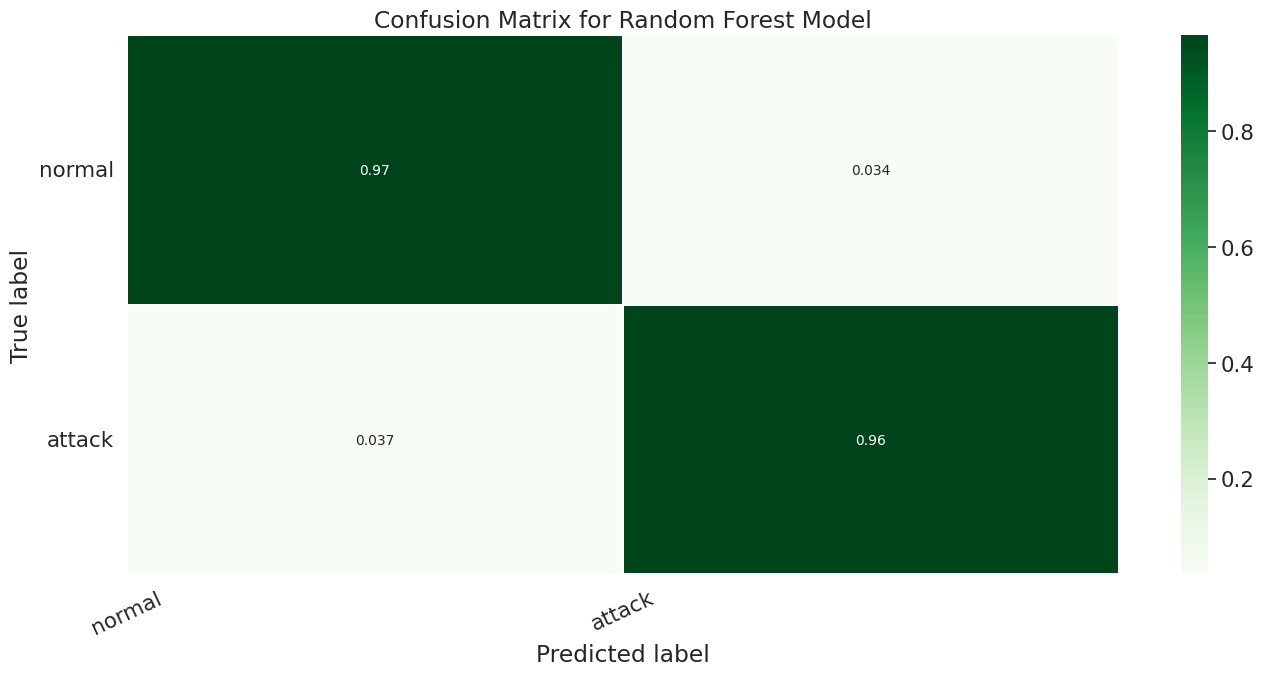

In [31]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       698
           1       0.97      0.96      0.96       702

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



# D-TREE 

In [33]:
d_tree = DecisionTreeClassifier()
start_time = time.time()
d_tree.fit(X_train, y_train)
end_time = time.time()
execution_time_dt = end_time - start_time
print("Time taken for training:", execution_time_dt, "seconds")

Time taken for training: 0.045380353927612305 seconds


In [34]:
y_pred_test = d_tree.predict(X_test)

In [35]:
accuracy_dt = accuracy_score(y_test, y_pred_test)
accuracy_dt

0.98

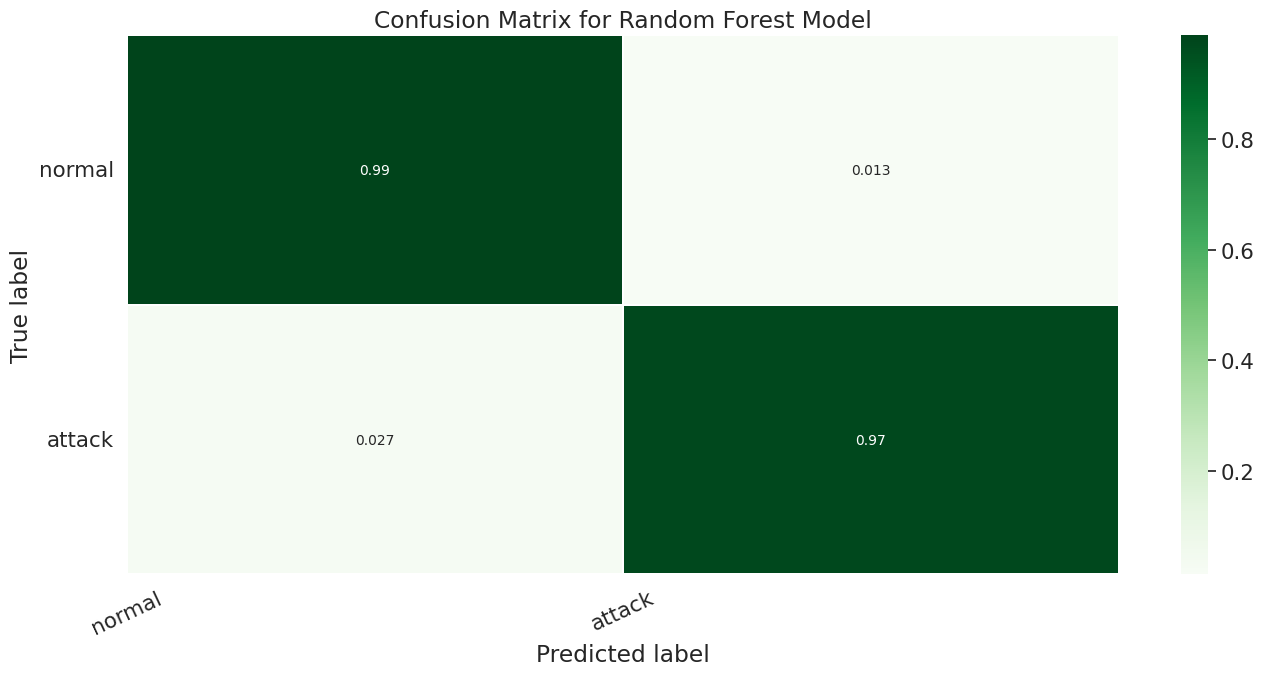

In [36]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       698
           1       0.99      0.97      0.98       702

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



# MultinomialNB

In [38]:
MB = MultinomialNB()
start_time = time.time()
MB.fit(X_train, y_train)
end_time = time.time()
execution_time_mb = end_time - start_time
print("Time taken for training:", execution_time_mb, "seconds")

Time taken for training: 0.015288114547729492 seconds


In [39]:
y_pred_test = MB.predict(X_test)

In [40]:
accuracy_mb = accuracy_score(y_test, y_pred_test)
accuracy_mb

0.8285714285714286

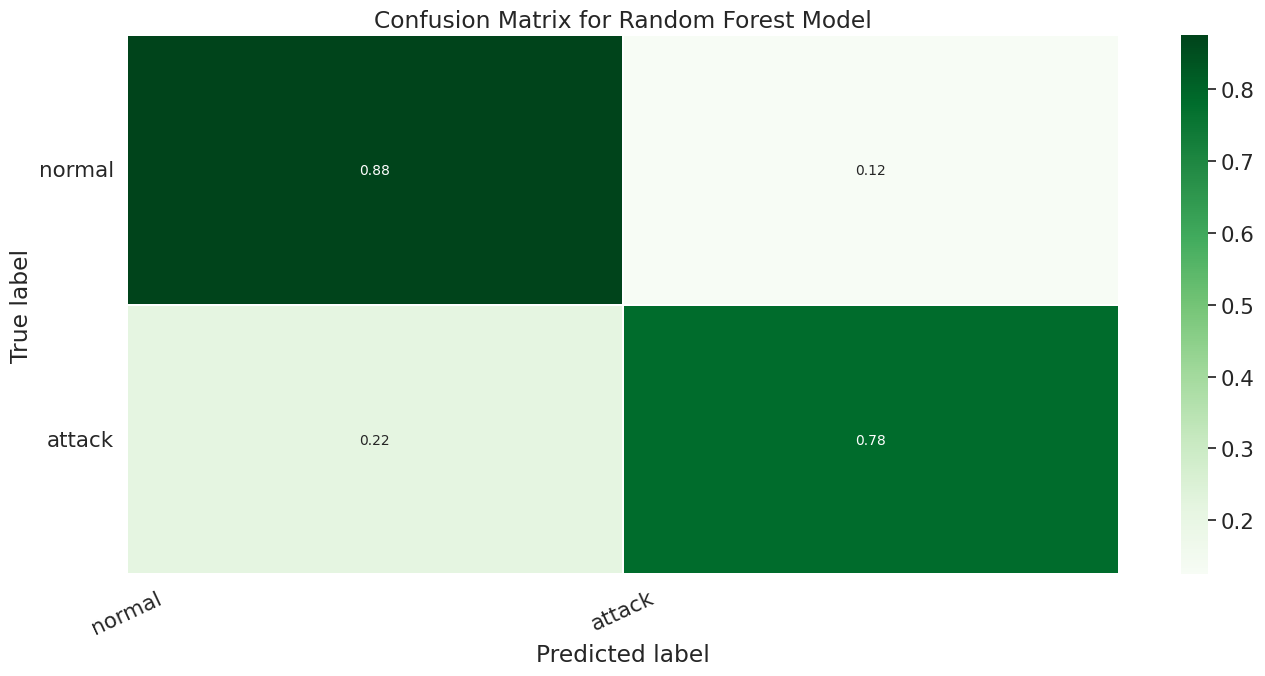

In [41]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       698
           1       0.86      0.78      0.82       702

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.83      1400
weighted avg       0.83      0.83      0.83      1400



# Logistic


In [43]:
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
execution_time_lr = end_time - start_time
print("Time taken for training:", execution_time_lr, "seconds")

Time taken for training: 0.14593935012817383 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
y_pred_test = lr.predict(X_test)

In [45]:
accuracy_lr = accuracy_score(y_test, y_pred_test)
accuracy_lr

0.8392857142857143

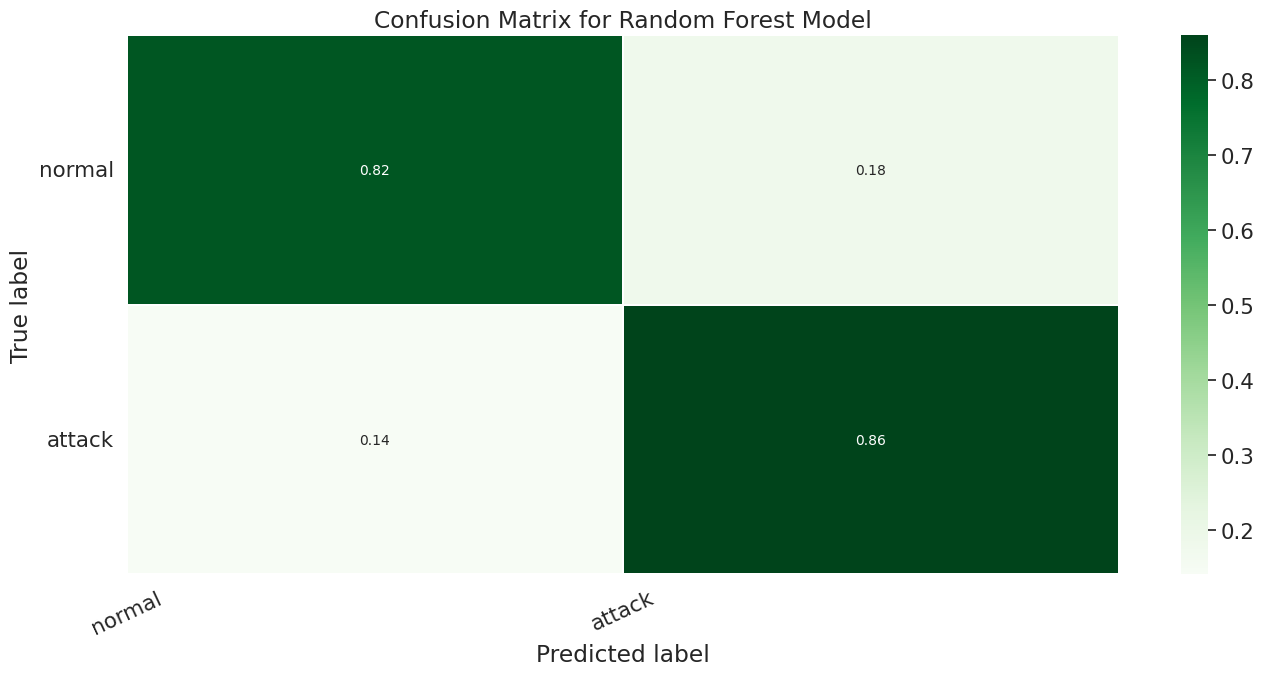

In [46]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [47]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84       698
           1       0.83      0.86      0.84       702

    accuracy                           0.84      1400
   macro avg       0.84      0.84      0.84      1400
weighted avg       0.84      0.84      0.84      1400



# SVM (Linear)

In [48]:
start_time = time.time()
SVMLN = LinearSVC().fit(X_train, y_train)
end_time = time.time()
execution_time_svmln = end_time - start_time
print("Time taken for training:", execution_time_svmln, "seconds")

Time taken for training: 0.7105157375335693 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
svclin_pred = SVMLN.predict(X_test)

In [50]:
accuracy_lin = accuracy_score(y_test, svclin_pred)
accuracy_lin

0.8385714285714285

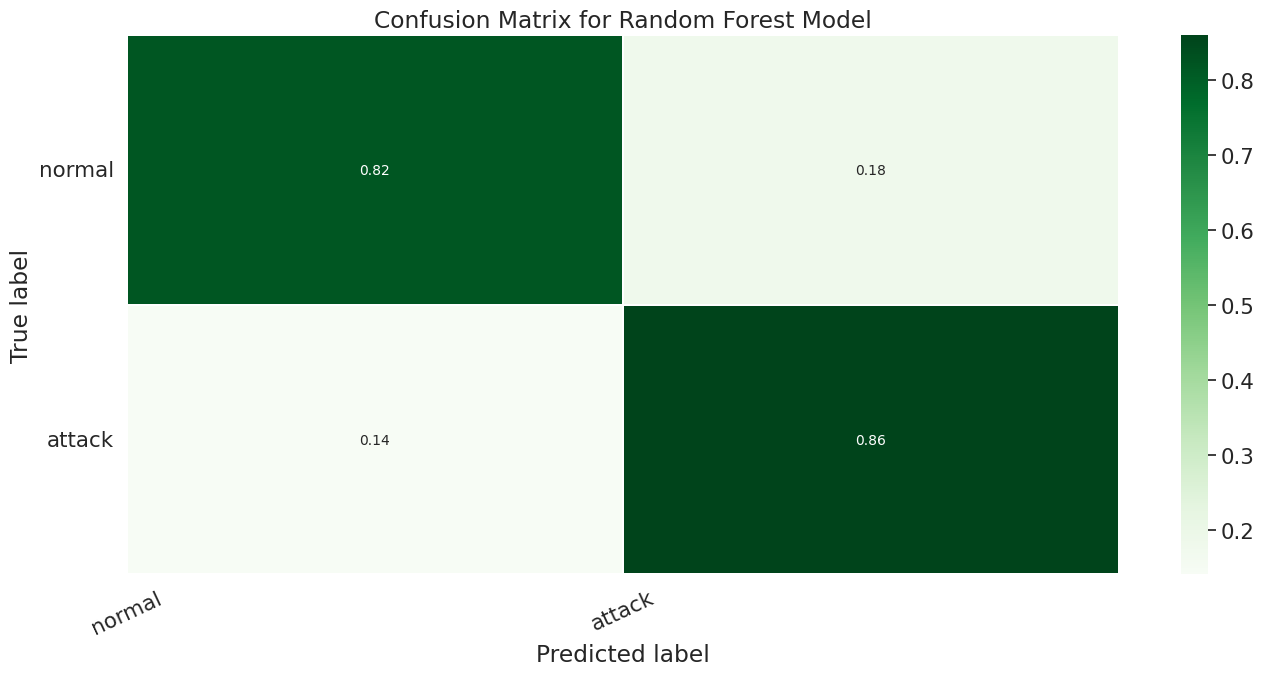

In [51]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [52]:
print("\033[1m" + "Classification report :" + "\033[0m")
print(classification_report(y_test, svclin_pred))

Classification report :
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       698
           1       0.95      0.71      0.82       702

    accuracy                           0.84      1400
   macro avg       0.86      0.84      0.84      1400
weighted avg       0.86      0.84      0.84      1400



# SVM (RBF)

In [53]:
start_time = time.time()
SVMRBF = LinearSVC().fit(X_train, y_train)
end_time = time.time()
execution_time_rbf = end_time - start_time
print("Time taken for training:", execution_time_rbf, "seconds")

Time taken for training: 0.7320747375488281 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
svc_pred = SVMRBF.predict(X_test)

In [55]:
accuracy_rbf = accuracy_score(y_test, svc_pred)
accuracy_rbf

0.895

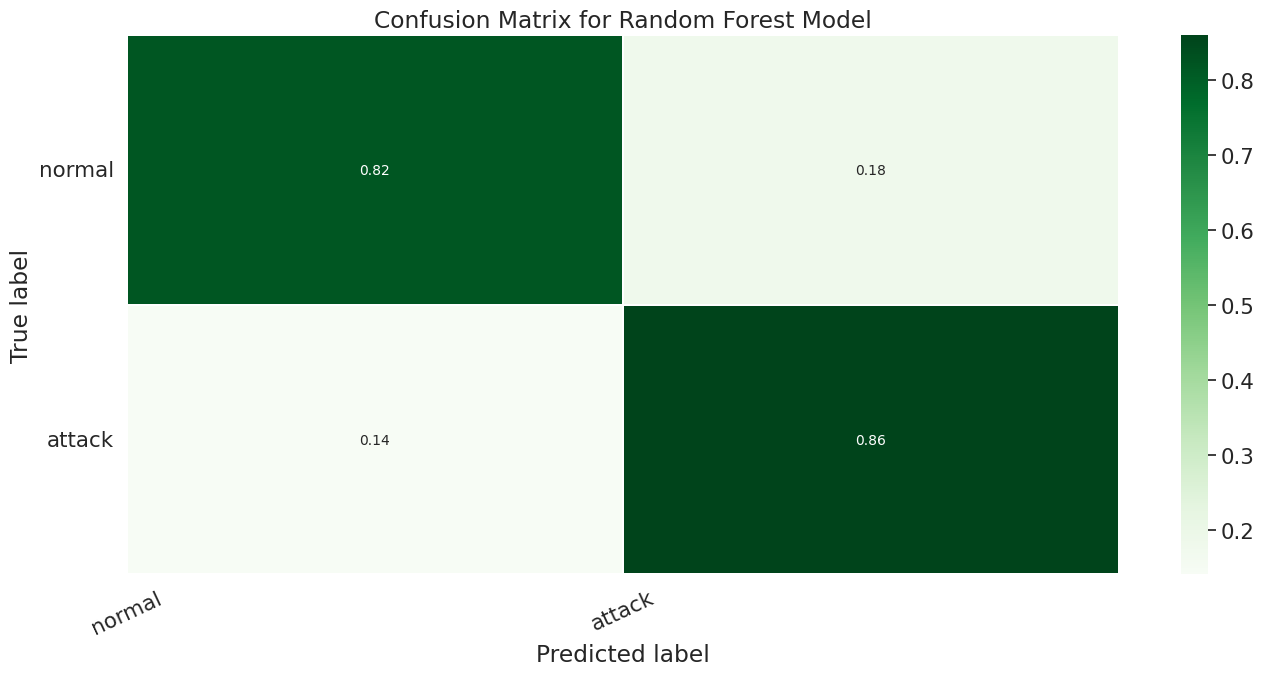

In [56]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [57]:
print("\033[1m" + "Classification report :" + "\033[0m")
print(classification_report(y_test, svc_pred))

Classification report :
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       698
           1       0.88      0.92      0.90       702

    accuracy                           0.90      1400
   macro avg       0.90      0.89      0.89      1400
weighted avg       0.90      0.90      0.89      1400



#Comparison

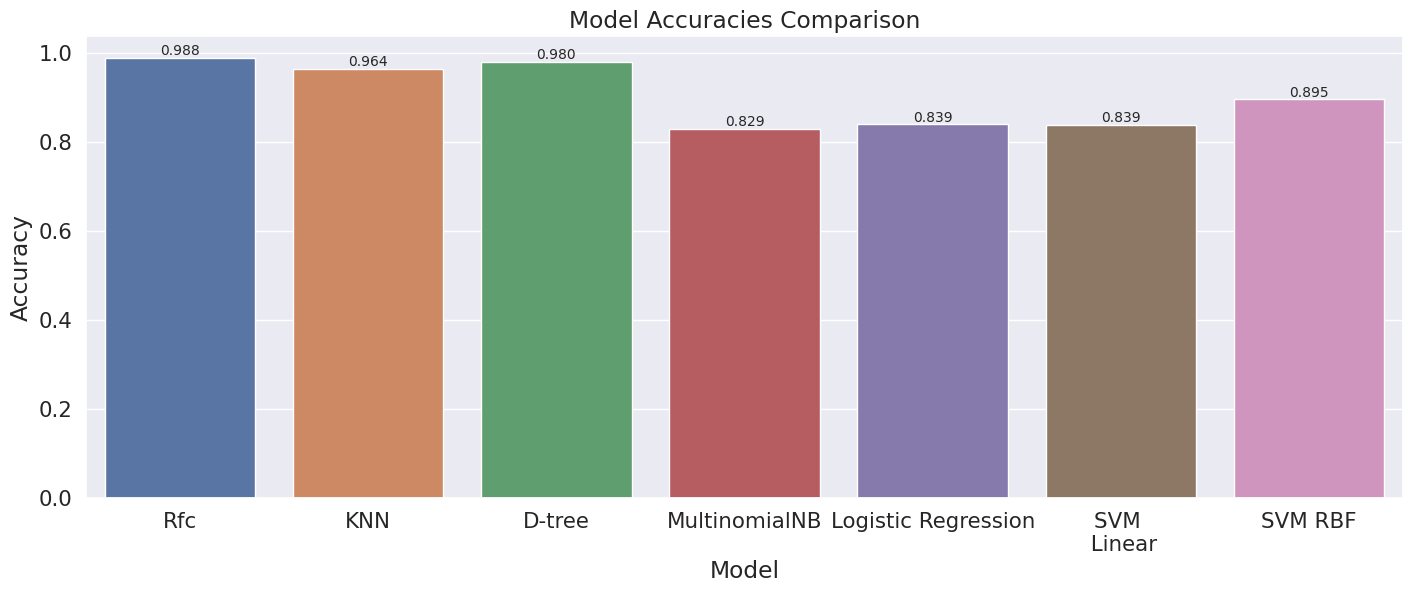

In [58]:
model_names = ['Rfc', 'KNN', 'D-tree', 'MultinomialNB', 'Logistic Regression', 'SVM \n Linear', 'SVM RBF']
accuracies = [accuracy_rf, accuracy_knn, accuracy_dt, accuracy_mb, accuracy_lr, accuracy_lin, accuracy_rbf]

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


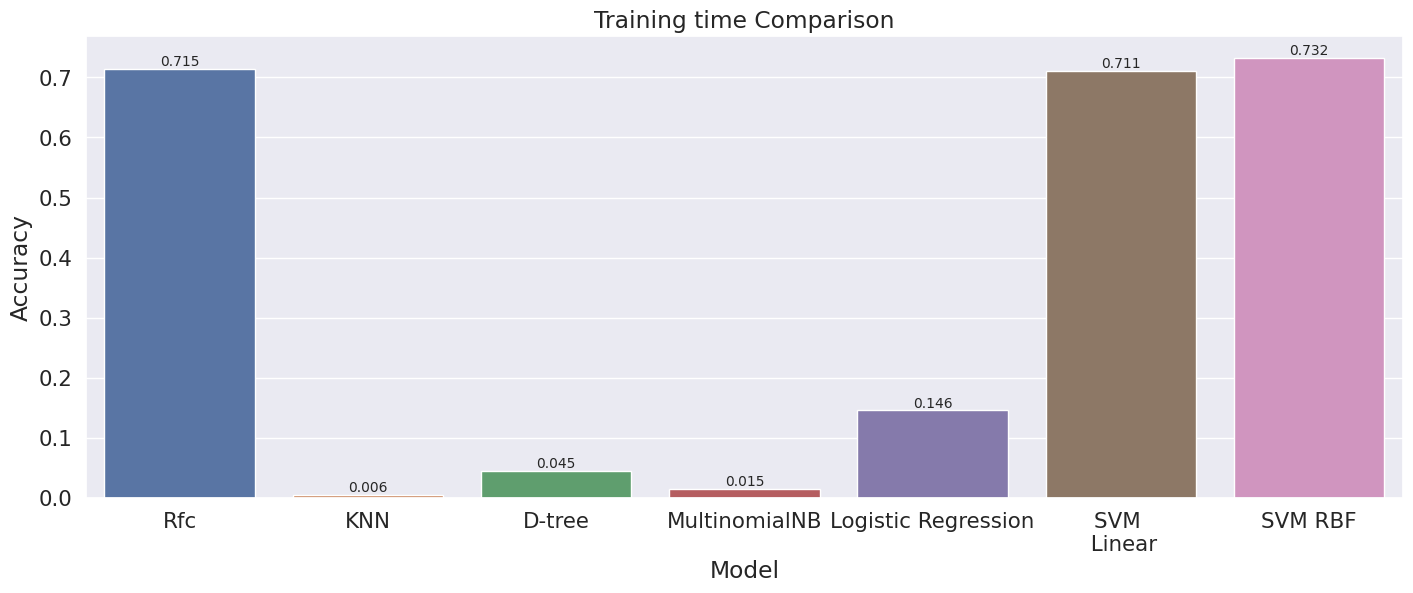

In [59]:
model_names = ['Rfc', 'KNN', 'D-tree', 'MultinomialNB', 'Logistic Regression', 'SVM \n Linear', 'SVM RBF']
accuracies = [execution_time_rfc, execution_time_knn, execution_time_dt, execution_time_mb, execution_time_lr, execution_time_svmln, execution_time_rbf]

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training time Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


#Feature selection using "zoofs"



In [60]:
!pip install zoofs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for zoofs: filename=zoofs-0.1.26-py3-none-any.whl size=23602 sha256=cb491cd66d1537de5276f1ca769283cb0a334d3893285b698a5b58c40c18400b
  Stored in directory: /root/.cache/pip/wheels/c5/47/90/d0547288297679ffb3e38d6d5b700dab7bc0314cf677051b77
Successfully built zoofs


##Particle Swarm Optimization

In [62]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import ParticleSwarmOptimization
# create object of algorithm
PSO=ParticleSwarmOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=False,c1=2,c2=2,w=0.9)



SVMRBF = SVC()
start_time = time.time()
selected_PSO = PSO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_pso = end_time - start_time
print("Time taken for training:", execution_time_pso, "seconds")
PSO.plot_history()

 [ 2023-05-23 17:17:51,865 ] Finished iteration #0 with objective value 0.7871428571428571. Current best value is 0.7871428571428571 
 [ 2023-05-23 17:18:39,979 ] Finished iteration #1 with objective value 0.8485714285714285. Current best value is 0.8485714285714285 
 [ 2023-05-23 17:19:22,717 ] Finished iteration #2 with objective value 0.8585714285714285. Current best value is 0.8585714285714285 
 [ 2023-05-23 17:19:53,708 ] Finished iteration #3 with objective value 0.8585714285714285. Current best value is 0.8585714285714285 
 [ 2023-05-23 17:20:26,846 ] Finished iteration #4 with objective value 0.8585714285714285. Current best value is 0.8585714285714285 
 [ 2023-05-23 17:20:55,971 ] Finished iteration #5 with objective value 0.8607142857142858. Current best value is 0.8607142857142858 
 [ 2023-05-23 17:21:26,257 ] Finished iteration #6 with objective value 0.8585714285714285. Current best value is 0.8607142857142858 
 [ 2023-05-23 17:21:54,758 ] Finished iteration #7 with object

Time taken for training: 373.9837236404419 seconds


In [63]:
selected_PSO

["'service'",
 "'wrong_fragment'",
 "'hot'",
 "'su_attempted'",
 "'num_file_creations'",
 "'num_shells'",
 "'num_access_files'",
 "'num_outbound_cmds'",
 "'is_host_login'",
 "'count'",
 "'srv_count'",
 "'srv_serror_rate'",
 "'srv_rerror_rate'",
 "'same_srv_rate'",
 "'diff_srv_rate'",
 "'dst_host_count'",
 "'dst_host_srv_count'",
 "'dst_host_same_srv_rate'",
 "'dst_host_same_src_port_rate'"]

In [64]:
X_train_selected = X_train[selected_PSO]
X_test_selected = X_test[selected_PSO]


### Random Forest part

In [65]:
forest1 = RandomForestClassifier()
start_time = time.time()
forest1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.5154139995574951 seconds


In [66]:
y_pred = forest1.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9828571428571429


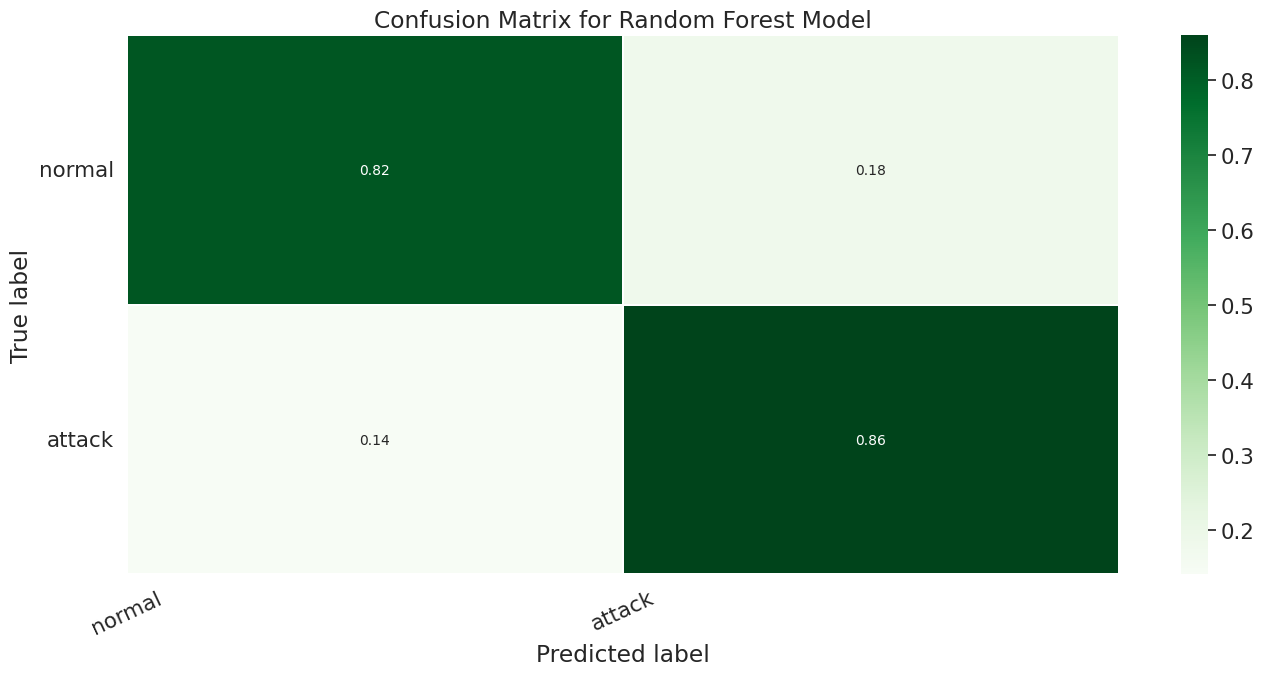

In [67]:
confusion_matrix(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [68]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       698
           1       0.98      0.98      0.98       702

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



### Descision Tree

In [69]:
d_tree1 = DecisionTreeClassifier()
start_time = time.time()
d_tree1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.026180505752563477 seconds


In [70]:
y_pred = d_tree1.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9742857142857143


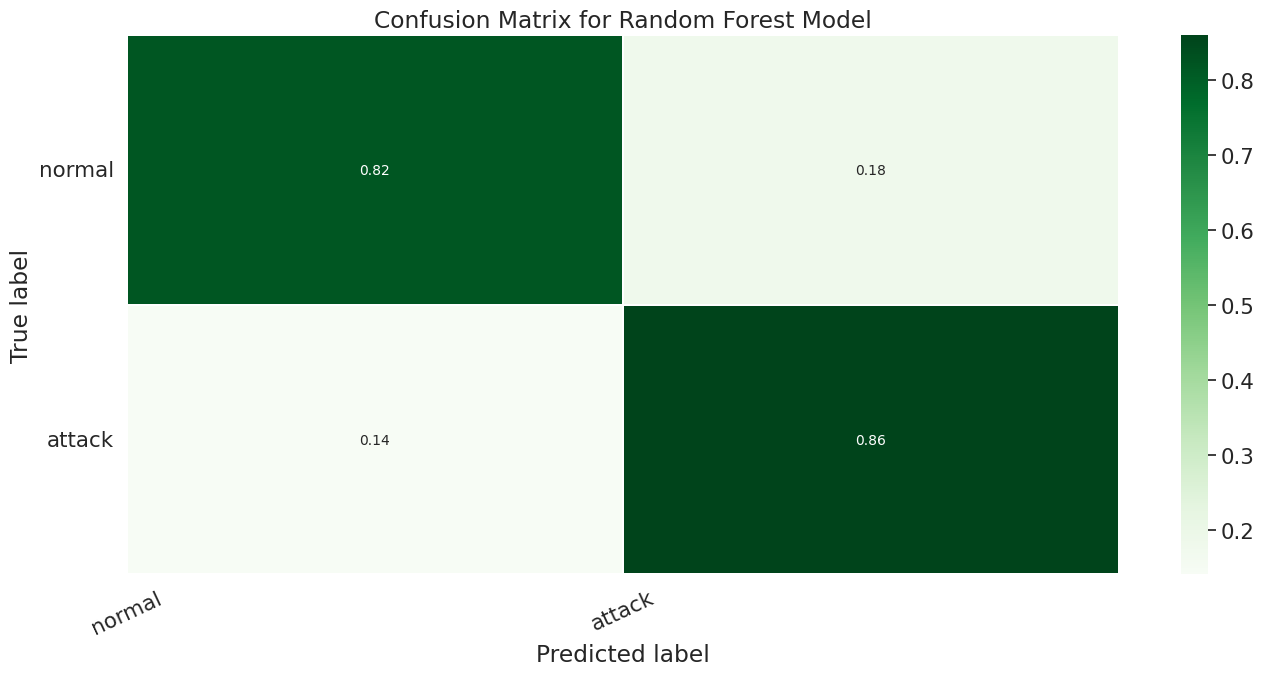

In [71]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [72]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       698
           1       0.98      0.97      0.97       702

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



###KNN part

In [73]:
KNN1 = KNeighborsClassifier()
start_time = time.time()
KNN1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.0071604251861572266 seconds


In [74]:
y_pred = KNN1.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred)

print('Accuracy:', accurac_knn)

Accuracy: 0.915


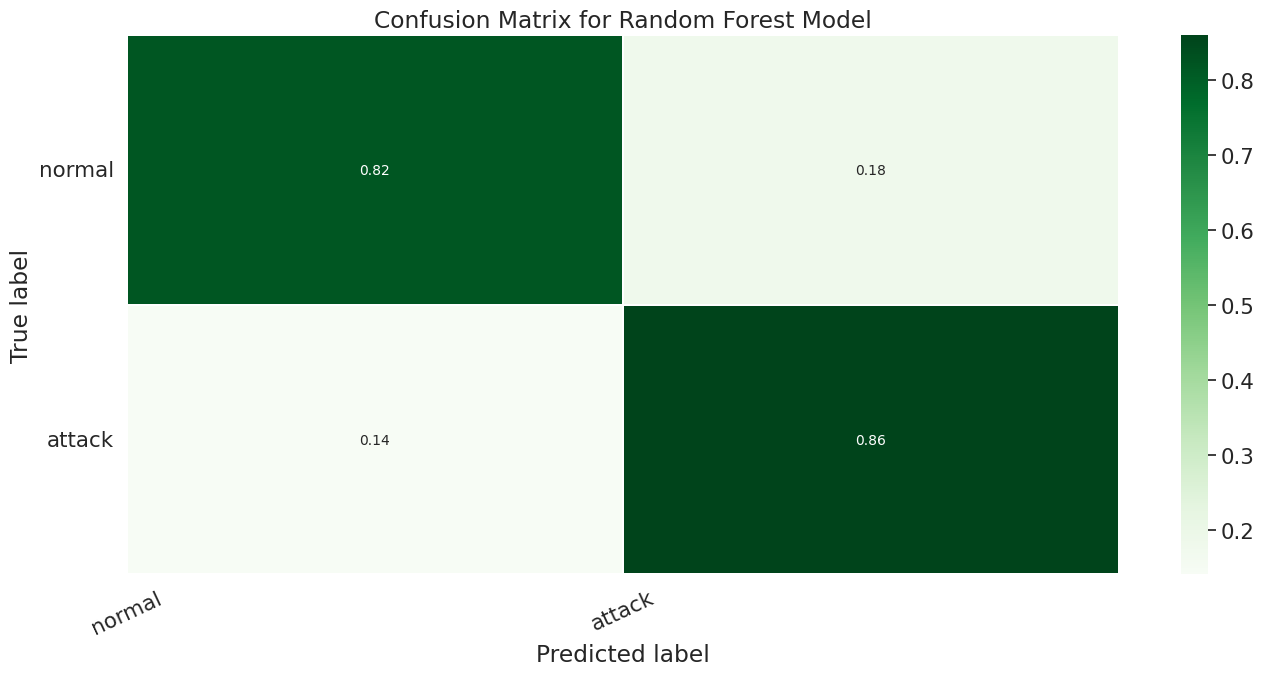

In [75]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [76]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91       698
           1       0.90      0.94      0.92       702

    accuracy                           0.92      1400
   macro avg       0.92      0.91      0.91      1400
weighted avg       0.92      0.92      0.91      1400



###Comparison

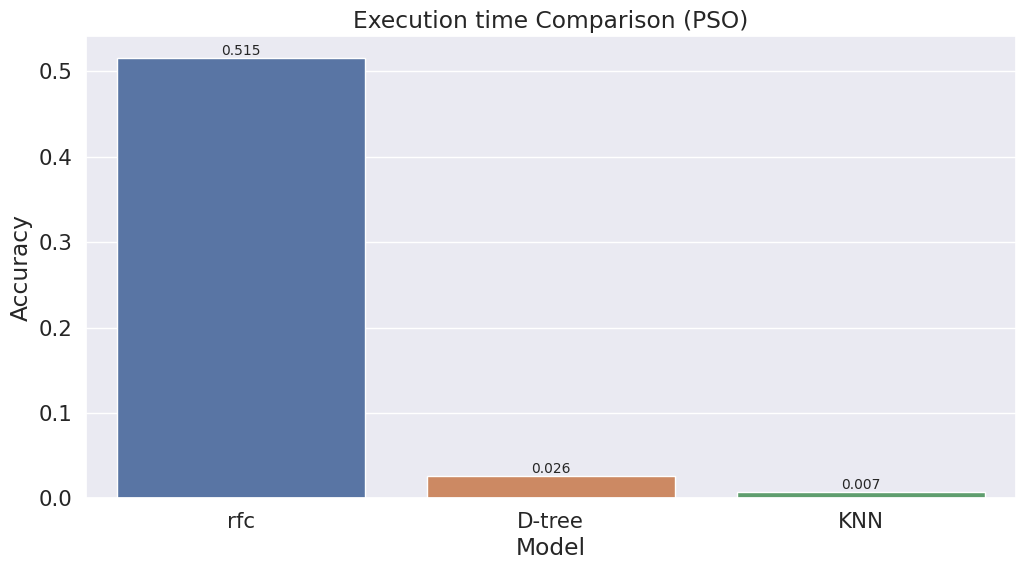

In [77]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


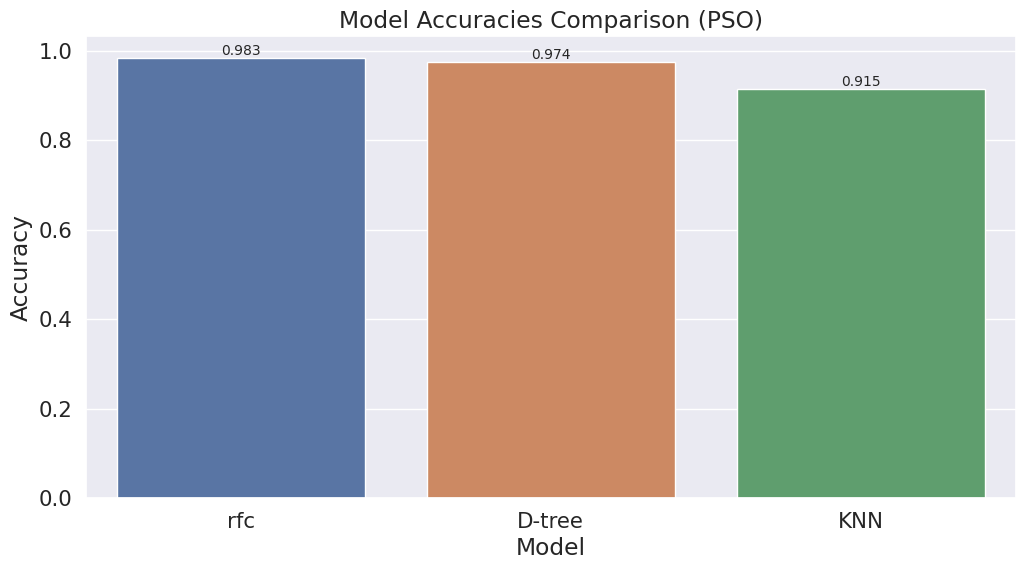

In [78]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## Grey Wolf Algorithm

In [79]:
from sklearn.metrics import log_loss
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import GreyWolfOptimization
# create object of algorithm
GWO=GreyWolfOptimization(objective_function_topass,n_iteration=10,method=1,
                                    population_size=20,minimize=False)

SVMRBF = SVC()
start_time = time.time()
selected_wolf = GWO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_gwo = end_time - start_time
print("Time taken for training:", execution_time_gwo, "seconds")
GWO.plot_history()

 [ 2023-05-23 17:24:03,696 ] Finished iteration #0 with objective value 0.8578571428571429. Current best value is 0.8578571428571429 
 [ 2023-05-23 17:24:50,985 ] Finished iteration #1 with objective value 0.8664285714285714. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:25:34,758 ] Finished iteration #2 with objective value 0.8664285714285714. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:26:26,590 ] Finished iteration #3 with objective value 0.8671428571428571. Current best value is 0.8671428571428571 
 [ 2023-05-23 17:27:19,295 ] Finished iteration #4 with objective value 0.865. Current best value is 0.8671428571428571 
 [ 2023-05-23 17:28:09,350 ] Finished iteration #5 with objective value 0.8664285714285714. Current best value is 0.8671428571428571 
 [ 2023-05-23 17:29:03,201 ] Finished iteration #6 with objective value 0.8664285714285714. Current best value is 0.8671428571428571 
 [ 2023-05-23 17:29:51,198 ] Finished iteration #7 with objective value 0.8

Time taken for training: 504.69567918777466 seconds


In [80]:
selected_wolf

["'duration'",
 "'service'",
 "'flag'",
 "'src_bytes'",
 "'land'",
 "'wrong_fragment'",
 "'urgent'",
 "'hot'",
 "'num_failed_logins'",
 "'logged_in'",
 "'num_compromised'",
 "'root_shell'",
 "'su_attempted'",
 "'num_root'",
 "'num_file_creations'",
 "'num_shells'",
 "'num_access_files'",
 "'num_outbound_cmds'",
 "'is_host_login'",
 "'is_guest_login'",
 "'count'",
 "'srv_count'",
 "'serror_rate'",
 "'srv_serror_rate'",
 "'rerror_rate'",
 "'srv_rerror_rate'",
 "'same_srv_rate'",
 "'diff_srv_rate'",
 "'dst_host_count'",
 "'dst_host_srv_count'",
 "'dst_host_same_srv_rate'",
 "'dst_host_diff_srv_rate'",
 "'dst_host_same_src_port_rate'",
 "'dst_host_srv_diff_host_rate'",
 "'dst_host_srv_serror_rate'",
 "'dst_host_rerror_rate'",
 "'dst_host_srv_rerror_rate'"]

In [81]:
X_train_selected = X_train[selected_wolf]
X_test_selected = X_test[selected_wolf]


### SVM part

In [82]:
start_time = time.time()
SVM2 = LinearSVC().fit(X_train_selected, y_train)
end_time = time.time()
execution_time_svmpso = end_time - start_time
print("Time taken for training:", execution_time_svmpso, "seconds")

Time taken for training: 0.45877790451049805 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [83]:
y_pred1 = SVM2.predict(X_test_selected)
accuracy_svm = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_svm)

Accuracy: 0.8607142857142858


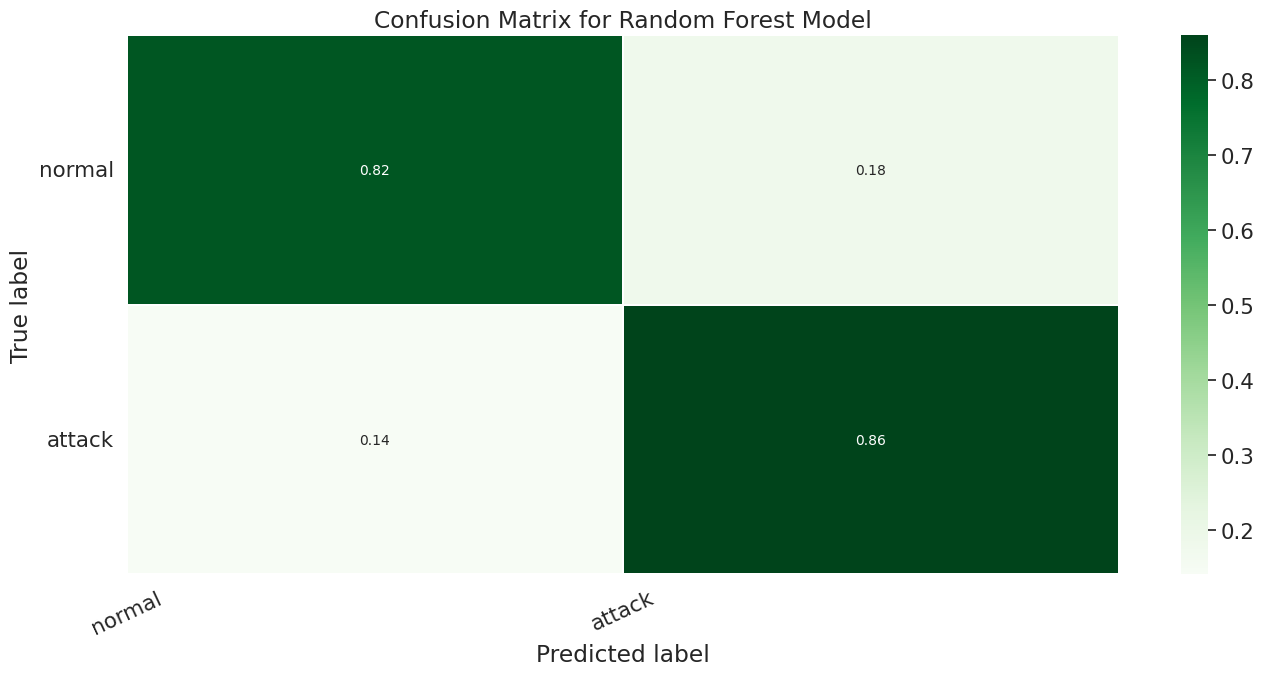

In [84]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [85]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       698
           1       0.86      0.87      0.86       702

    accuracy                           0.86      1400
   macro avg       0.86      0.86      0.86      1400
weighted avg       0.86      0.86      0.86      1400



### Random Forest

In [86]:
forest2 = RandomForestClassifier()
start_time = time.time()
forest2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.5306415557861328 seconds


In [87]:
y_pred1 = forest2.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9892857142857143


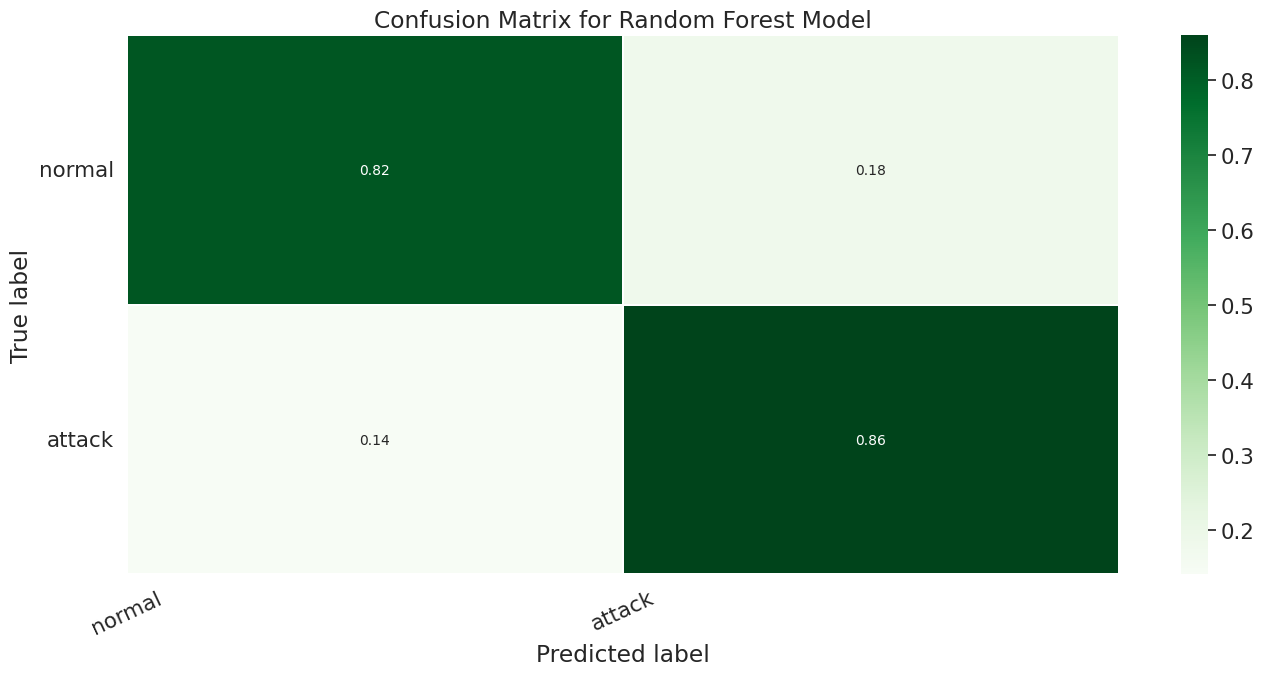

In [88]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [89]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       702

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



### Descision Tree

In [90]:
d_tree2 = DecisionTreeClassifier()
start_time = time.time()
d_tree2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.03252911567687988 seconds


In [91]:
y_pred1 = d_tree2.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9807142857142858


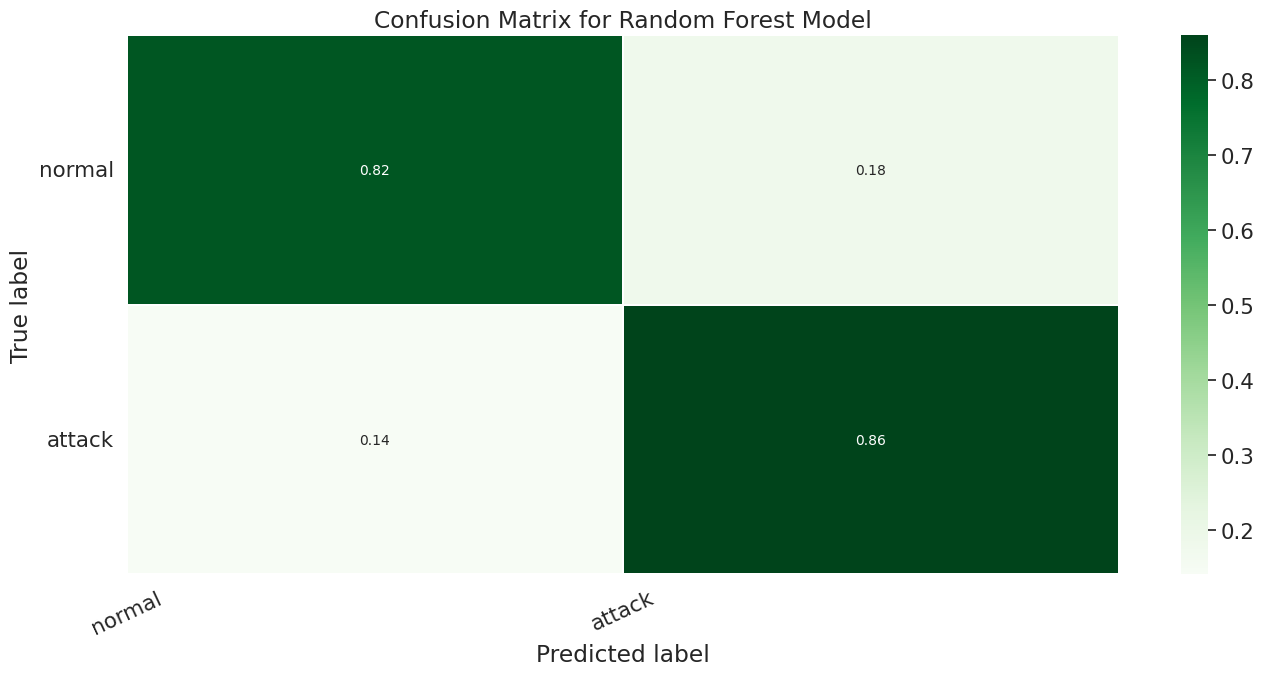

In [92]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [93]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       698
           1       0.98      0.98      0.98       702

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



###KNN part

In [94]:
KNN2 = KNeighborsClassifier()
start_time = time.time()
KNN2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.005676984786987305 seconds


In [95]:
y_pred1 = KNN2.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred1)

print('Accuracy:', accurac_knn)

Accuracy: 0.9592857142857143


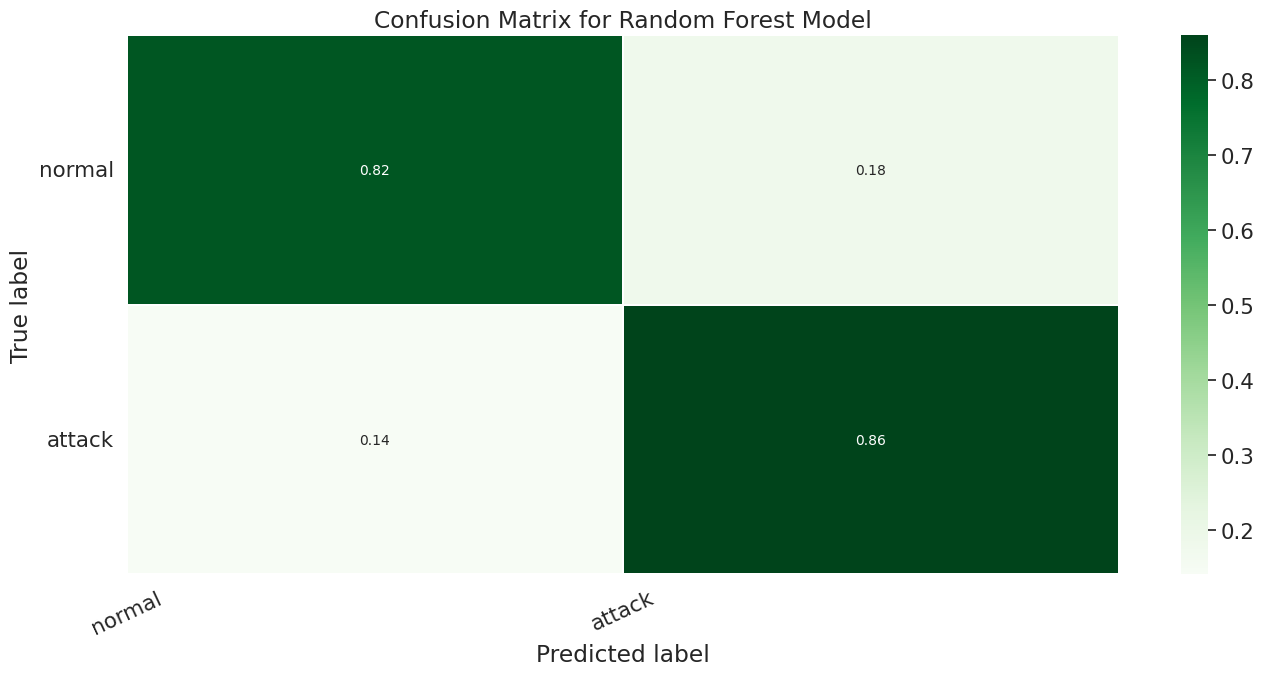

In [96]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [97]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       698
           1       0.96      0.96      0.96       702

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



###Comparison

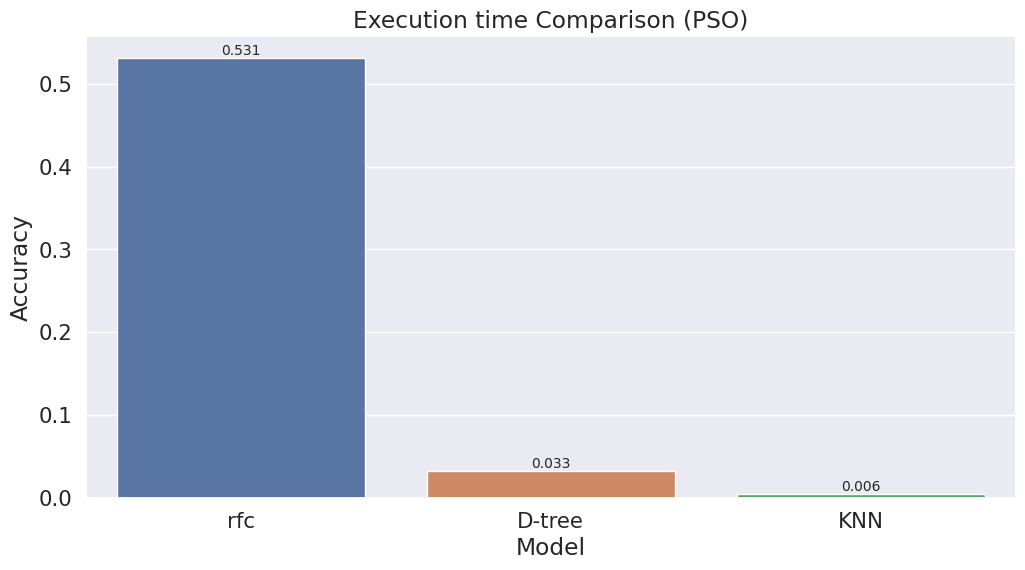

In [98]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


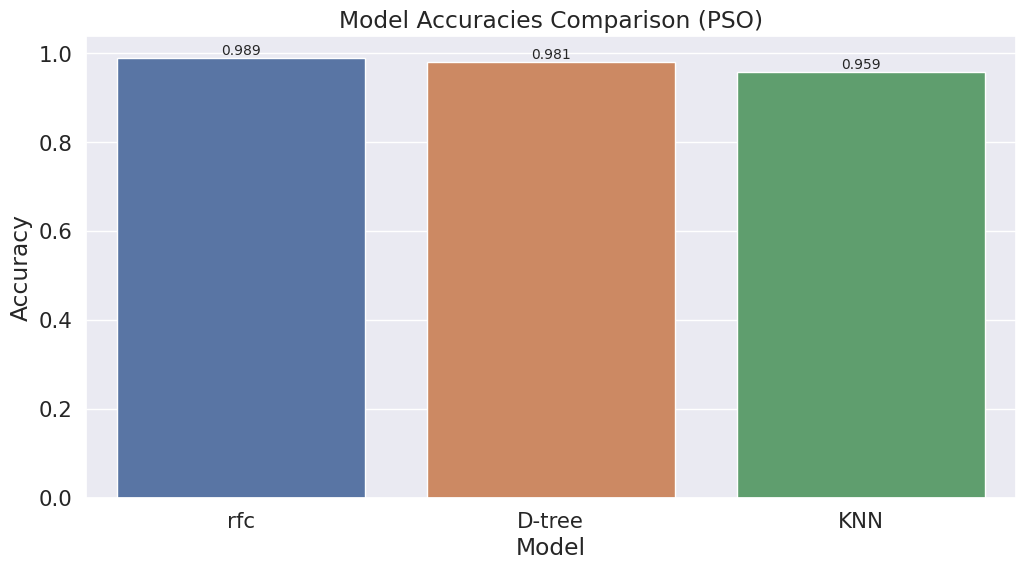

In [99]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [ accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## Harris Hawk Optimization

In [100]:
from sklearn.metrics import log_loss
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import HarrisHawkOptimization
# create object of algorithm
HHO=HarrisHawkOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=False)
SVMRBF = SVC()
start_time = time.time()
selected_hawk = HHO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_HHO = end_time - start_time
print("Time taken for training:", execution_time_HHO, "seconds")
HHO.plot_history()

 [ 2023-05-23 17:32:23,332 ] Finished iteration #0 with objective value 0.865. Current best value is 0.865 
 [ 2023-05-23 17:33:34,284 ] Finished iteration #1 with objective value 0.8642857142857143. Current best value is 0.865 
 [ 2023-05-23 17:34:36,349 ] Finished iteration #2 with objective value 0.8642857142857143. Current best value is 0.865 
 [ 2023-05-23 17:35:32,533 ] Finished iteration #3 with objective value 0.8478571428571429. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:36:44,157 ] Finished iteration #4 with objective value 0.8664285714285714. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:38:09,898 ] Finished iteration #5 with objective value 0.8657142857142858. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:39:20,638 ] Finished iteration #6 with objective value 0.8657142857142858. Current best value is 0.8664285714285714 
 [ 2023-05-23 17:40:48,160 ] Finished iteration #7 with objective value 0.8657142857142858. Current best value is 

Time taken for training: 719.5204768180847 seconds


In [101]:
selected_hawk

["'protocol_type'",
 "'service'",
 "'land'",
 "'wrong_fragment'",
 "'urgent'",
 "'num_failed_logins'",
 "'root_shell'",
 "'num_root'",
 "'num_file_creations'",
 "'num_access_files'",
 "'is_guest_login'",
 "'count'",
 "'srv_count'",
 "'serror_rate'",
 "'srv_serror_rate'",
 "'srv_rerror_rate'",
 "'srv_diff_host_rate'",
 "'dst_host_count'",
 "'dst_host_srv_count'",
 "'dst_host_serror_rate'",
 "'dst_host_srv_rerror_rate'"]

In [102]:
X_train_selected = X_train[selected_hawk]
X_test_selected = X_test[selected_hawk]


### Random Forest

In [103]:
forest3 = RandomForestClassifier()
start_time = time.time()
forest3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.44161272048950195 seconds


In [104]:
y_pred2 = forest3.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9807142857142858


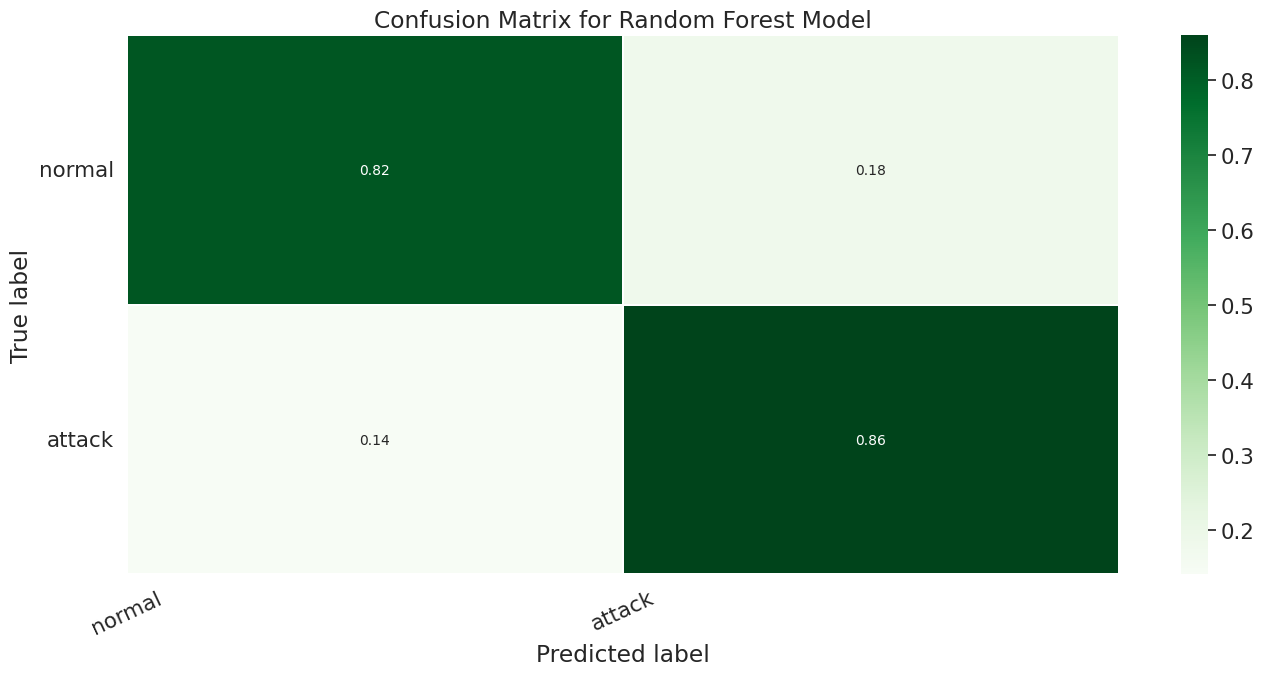

In [105]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [106]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       698
           1       0.98      0.98      0.98       702

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



### Descision Tree

In [107]:
d_tree3 = DecisionTreeClassifier()
start_time = time.time()
d_tree3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.0190274715423584 seconds


In [108]:
y_pred2 = d_tree3.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9707142857142858


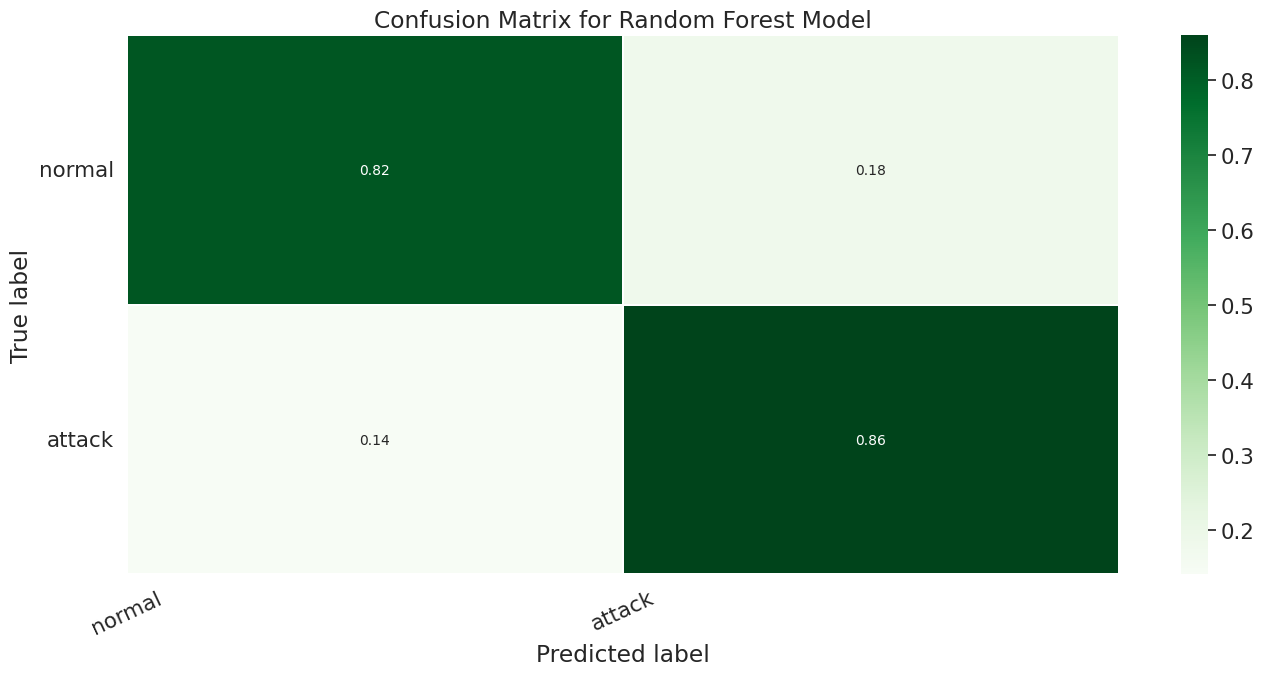

In [109]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [110]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       698
           1       0.97      0.97      0.97       702

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



###KNN part

In [111]:
KNN3 = KNeighborsClassifier()
start_time = time.time()
KNN3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.004969596862792969 seconds


In [112]:
y_pred2 = KNN3.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred2)

print('Accuracy:', accurac_knn)

Accuracy: 0.9114285714285715


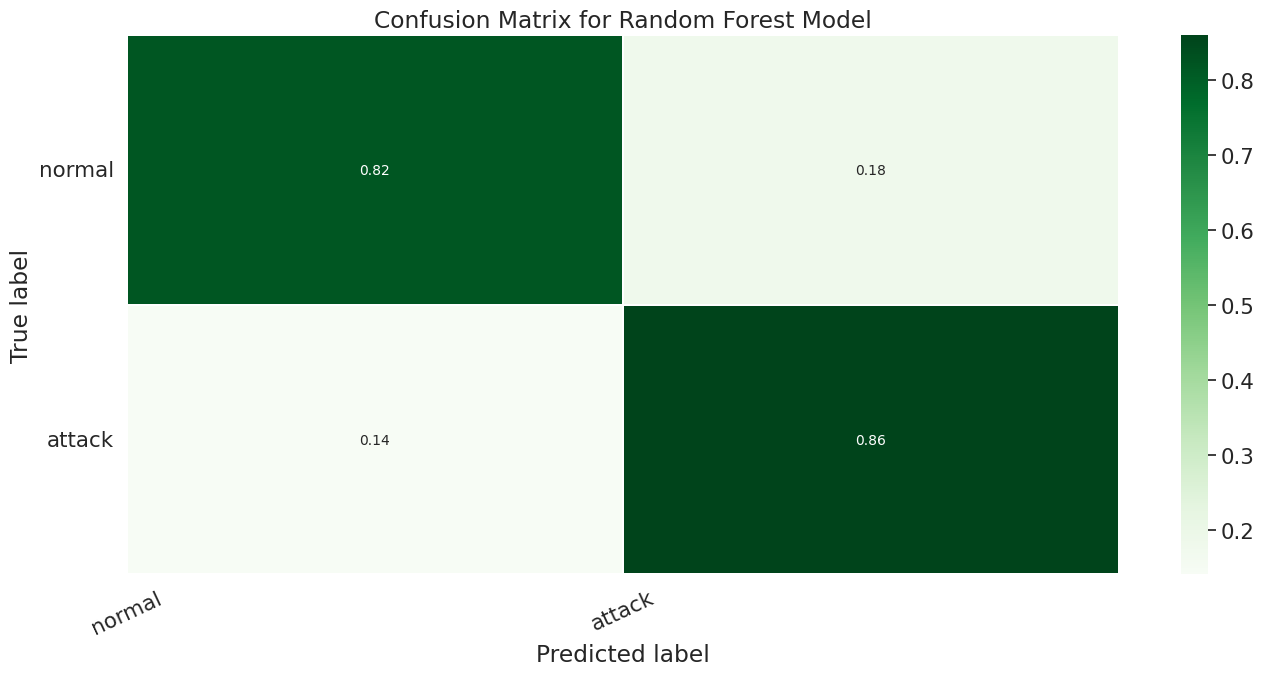

In [113]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [114]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       698
           1       0.89      0.94      0.91       702

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



###Comparison

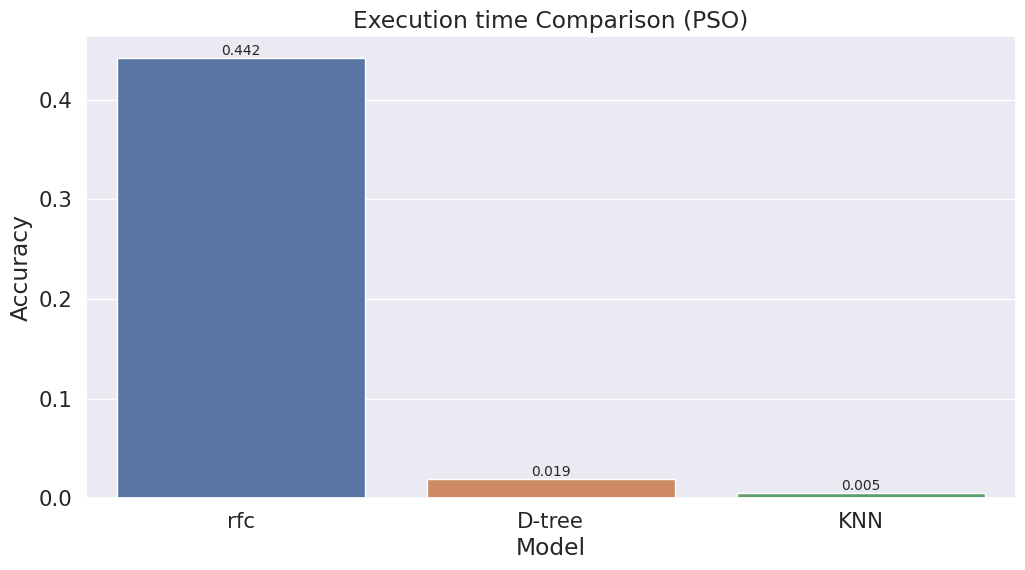

In [115]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


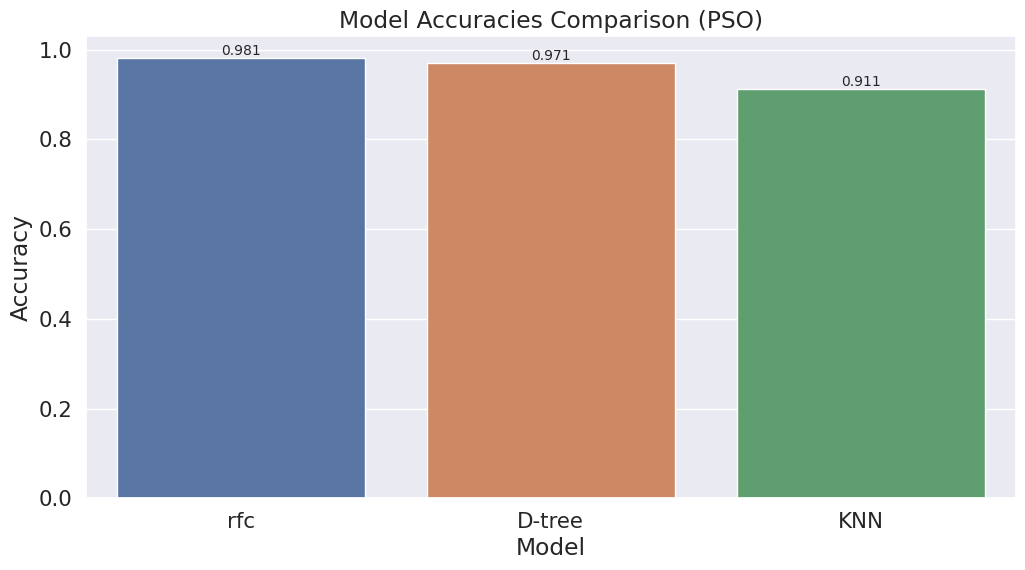

In [116]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## DragonFly Optimization

In [117]:
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)  
    return accuracy

# import an algorithm !  
from zoofs import DragonFlyOptimization
# create object of algorithm
DFO=DragonFlyOptimization(objective_function_topass,n_iteration=10,method='sinusoidal',
                                    population_size=20,minimize=True)

SVMRBF = SVC()
start_time = time.time()
selected_dragon = DFO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_DFO = end_time - start_time
print("Time taken for training:", execution_time_DFO, "seconds")
DFO.plot_history()

 [ 2023-05-23 17:44:13,320 ] Finished iteration #0 with objective value 0.5135714285714286. Current best value is 0.5135714285714286 
 [ 2023-05-23 17:45:07,335 ] Finished iteration #1 with objective value 0.5114285714285715. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:45:57,447 ] Finished iteration #2 with objective value 0.5114285714285715. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:46:40,268 ] Finished iteration #3 with objective value 0.5114285714285715. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:47:27,732 ] Finished iteration #4 with objective value 0.5114285714285715. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:48:14,158 ] Finished iteration #5 with objective value 0.5114285714285715. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:48:51,663 ] Finished iteration #6 with objective value 0.5135714285714286. Current best value is 0.5114285714285715 
 [ 2023-05-23 17:49:34,351 ] Finished iteration #7 with object

Time taken for training: 460.1676959991455 seconds


In [118]:
selected_dragon

["'duration'",
 "'protocol_type'",
 "'service'",
 "'flag'",
 "'land'",
 "'wrong_fragment'",
 "'num_failed_logins'",
 "'num_compromised'",
 "'root_shell'",
 "'num_root'",
 "'num_file_creations'",
 "'num_shells'",
 "'serror_rate'",
 "'srv_serror_rate'",
 "'rerror_rate'",
 "'srv_rerror_rate'",
 "'same_srv_rate'",
 "'srv_diff_host_rate'",
 "'dst_host_srv_diff_host_rate'",
 "'dst_host_srv_serror_rate'"]

In [119]:
X_train_selected = X_train[selected_dragon]
X_test_selected = X_test[selected_dragon]


### Random Forest

In [120]:
forest4 = RandomForestClassifier()
start_time = time.time()
forest4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.7486536502838135 seconds


In [121]:
y_pred4 = forest4.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred4)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9757142857142858


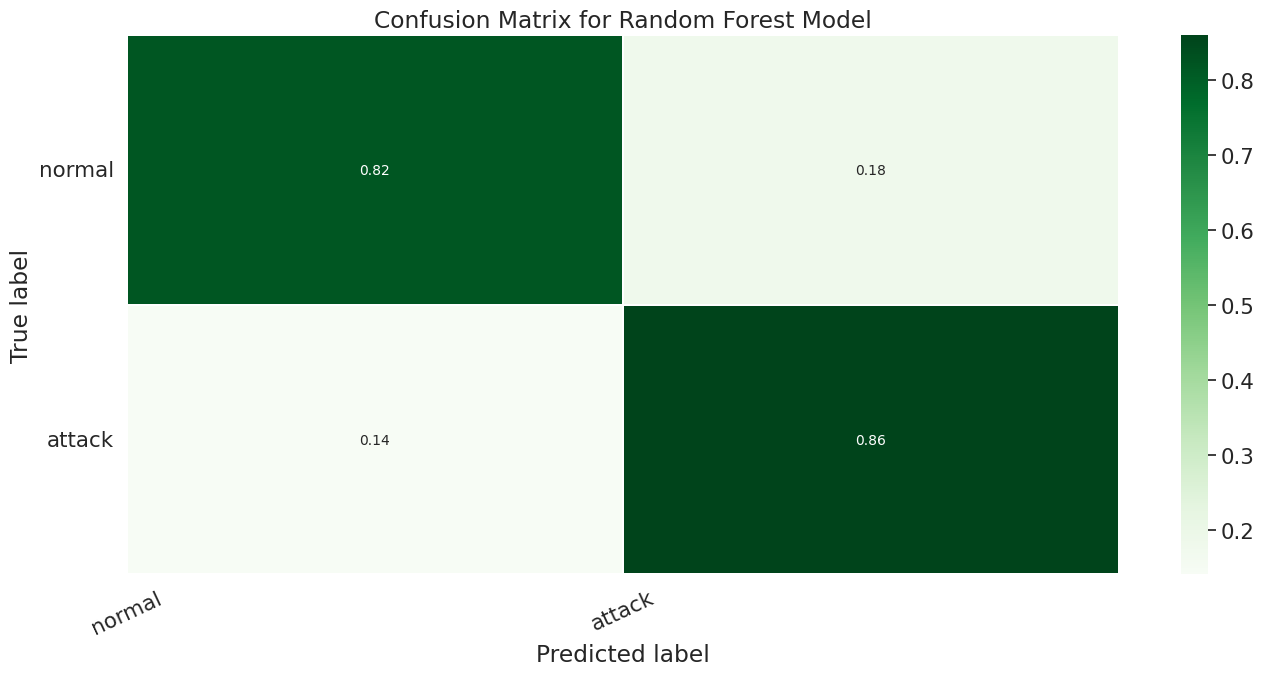

In [122]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [123]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       698
           1       0.97      0.99      0.98       702

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



### Descision Tree

In [124]:
d_tree4 = DecisionTreeClassifier()
start_time = time.time()
d_tree4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.021333694458007812 seconds


In [125]:
y_pred4 = d_tree4.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred4)
print('Accuracy:', accuracy_dt)

Accuracy: 0.97


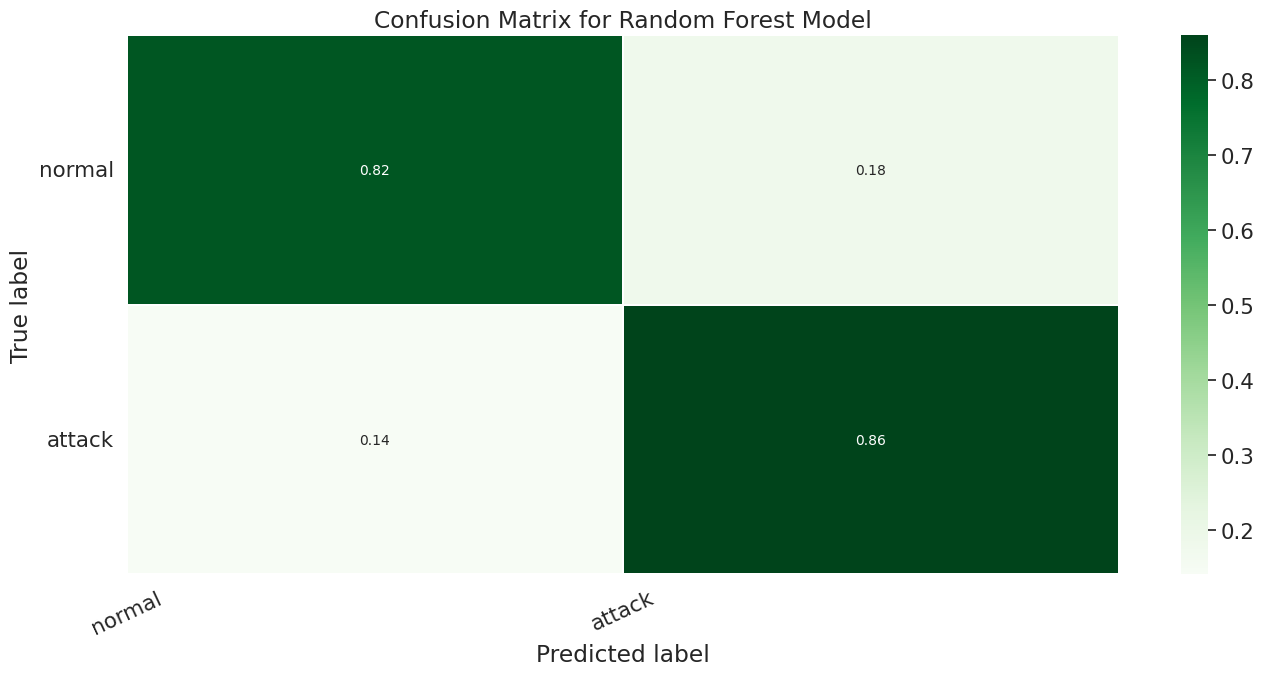

In [126]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [127]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       698
           1       0.96      0.98      0.97       702

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



###KNN part

In [128]:
KNN4 = KNeighborsClassifier()
start_time = time.time()
KNN4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.009515762329101562 seconds


In [129]:
y_pred4 = KNN4.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred4)

print('Accuracy:', accurac_knn)

Accuracy: 0.9721428571428572


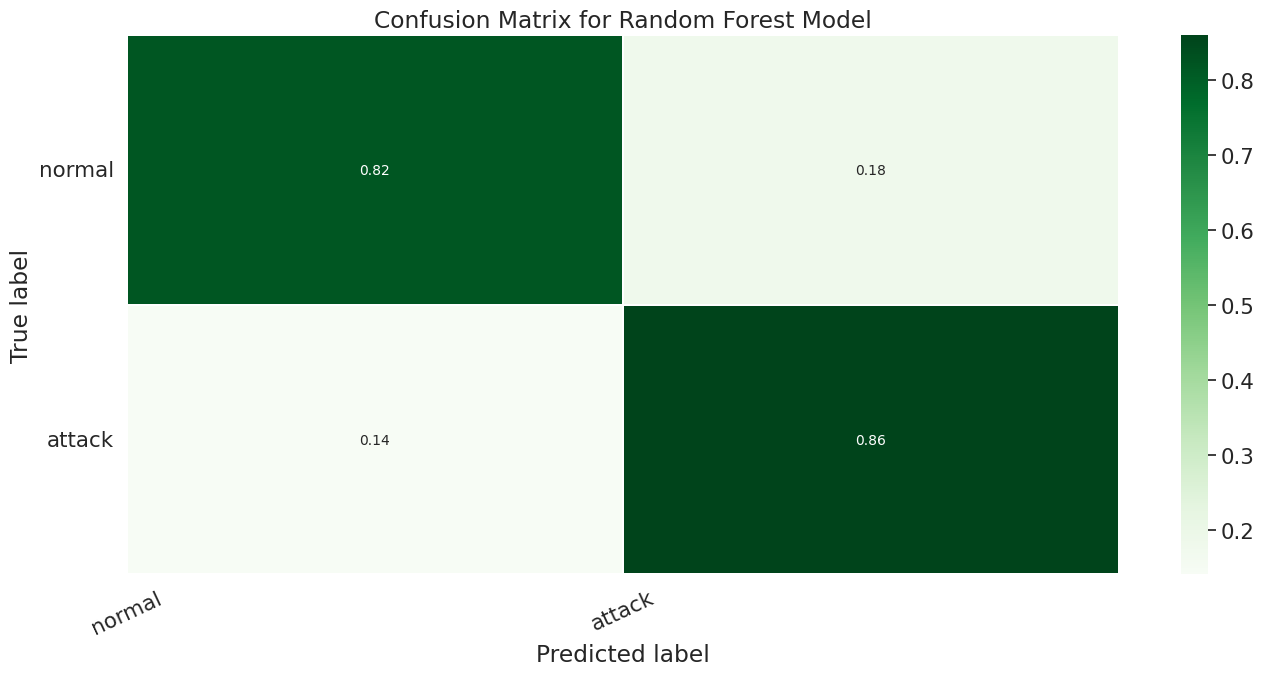

In [130]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [131]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       698
           1       0.96      0.98      0.97       702

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



###Comparison

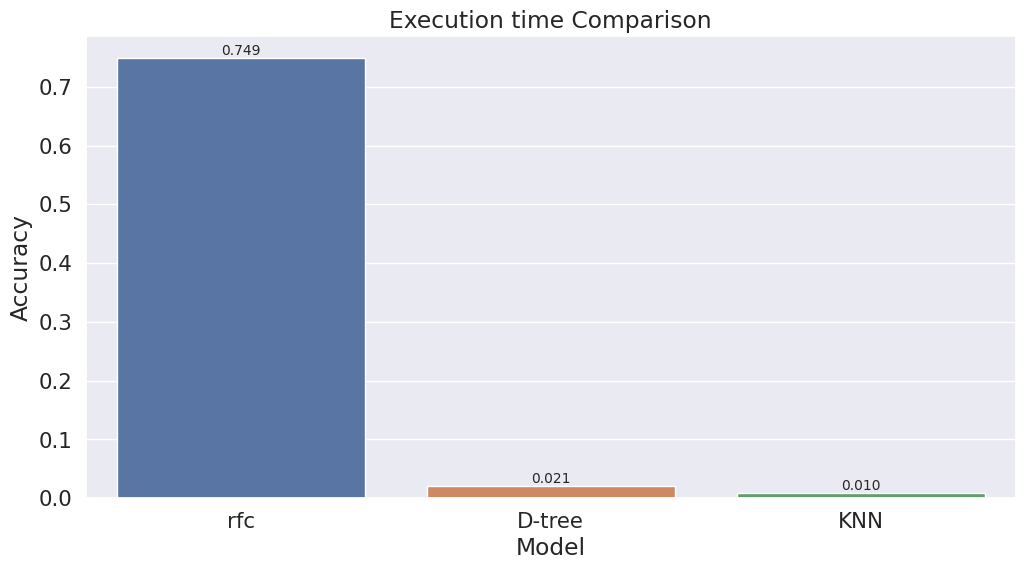

In [132]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


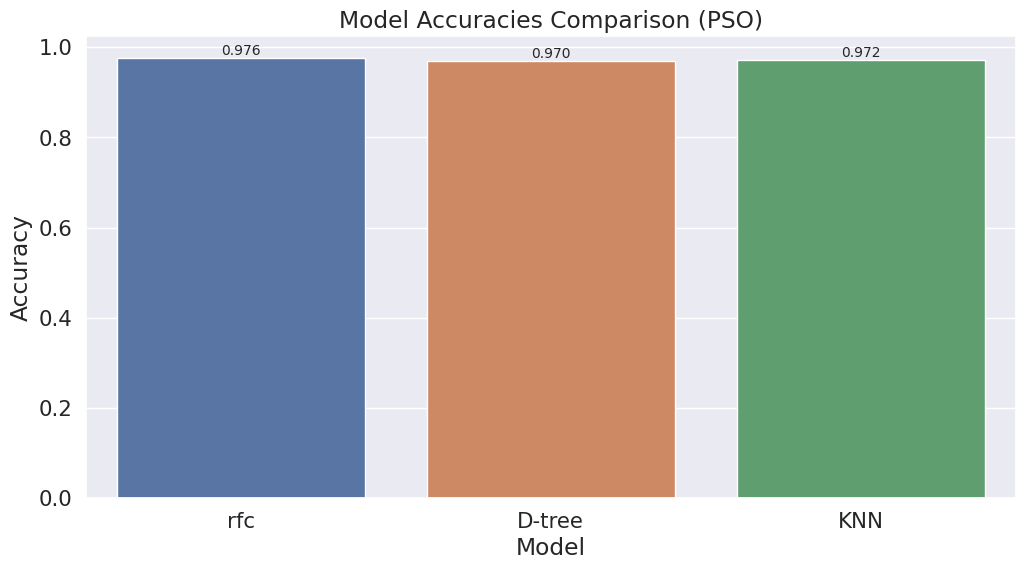

In [133]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()
